In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import psycopg2

In [2]:
connection = psycopg2.connect(user = "postgres",
                                  password = "postgres",
                                  host = "127.0.0.1",
                                  port = "5432",
                                  database = "stock")
cursor = connection.cursor()

query = "select * from fundamental f inner join sector s on f.stock_id = s.stock_id"
query1 = """select * from fundamental as f inner join sector as s on f.stock_id = s.stock_id  
                inner join balance_sheet as b on f.stock_id = b.stock_id"""

In [3]:
Fund = pd.read_sql(query1, connection, parse_dates=['year'])
Fund['sector'] = Fund['sector'].str.rstrip("\n")
Fund = Fund.ix[:,~Fund.columns.duplicated()]
Fund.head()

/home/nandagopal/PycharmProjects/data-science-class/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/home/nandagopal/PycharmProjects/data-science-class/venv/lib/python3.6/site-packages/pandas/core/indexing.py:808: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


,stock_id,bv_sh,divd,eps,f_v,mkt_cap,p_b,p_e,industry,sector,id,year,net_worth,total_liabilities,total_current_assests,net_current_assets,total_assets
0,3PLAND,17.46,NaN,-0.16,2.0,10.98,0.35,-38.13,Real Estate,Real Estate,1303,2019-04-01,31.43,33.81,2.82,2.65,33.81
1,3PLAND,17.46,NaN,-0.16,2.0,10.98,0.35,-38.13,Real Estate,Real Estate,1304,2018-04-01,33.89,48.95,15.78,15.61,48.95
2,3PLAND,17.46,NaN,-0.16,2.0,10.98,0.35,-38.13,Real Estate,Real Estate,1305,2017-04-01,33.93,51.95,19.16,18.53,51.95
3,3PLAND,17.46,NaN,-0.16,2.0,10.98,0.35,-38.13,Real Estate,Real Estate,1306,2016-04-01,34.06,50.44,17.49,17.00,50.44
4,3PLAND,17.46,NaN,-0.16,2.0,10.98,0.35,-38.13,Real Estate,Real Estate,1307,2015-04-01,43.20,116.06,81.33,62.68,116.06


In [4]:
def filter(df, col, val):
    return df[df[col] == val]
    


    stock_id       year  net_worth    nw_pct
441  ARCHIES 2015-04-01     108.05       NaN
440  ARCHIES 2016-04-01     110.72  0.024711
439  ARCHIES 2017-04-01     106.71 -0.036217
438  ARCHIES 2018-04-01     117.55  0.101584
437  ARCHIES 2019-04-01     118.01  0.003913
     stock_id       year  net_worth    nw_pct
1785    DMART 2015-04-01    1192.91       NaN
1784    DMART 2016-04-01    1511.86  0.267371
1783    DMART 2017-04-01    3837.06  1.537973
1782    DMART 2018-04-01    4642.71  0.209965
1781    DMART 2019-04-01    5594.48  0.205003
     stock_id       year  net_worth    nw_pct
2170     FLFL 2015-04-01    1569.72       NaN
2169     FLFL 2016-04-01    1623.24  0.034095
2168     FLFL 2017-04-01    1287.88 -0.206599
2167     FLFL 2018-04-01    1393.88  0.082306
2166     FLFL 2019-04-01    1647.65  0.182060
     stock_id       year  net_worth    nw_pct
2200  FRETAIL 2015-04-01    -288.60       NaN
2199  FRETAIL 2016-04-01    1874.19 -7.494075
2198  FRETAIL 2017-04-01    2553.66  0.3

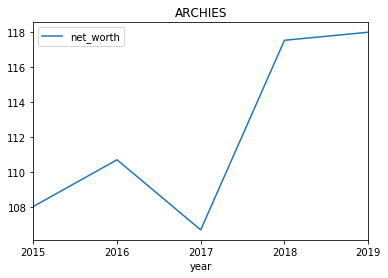

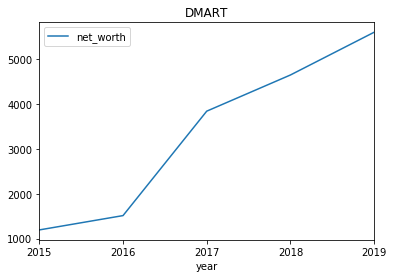

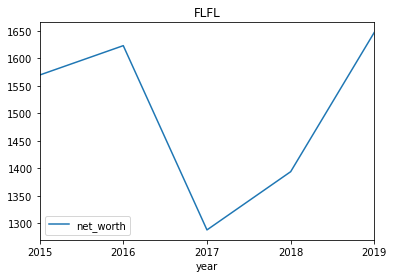

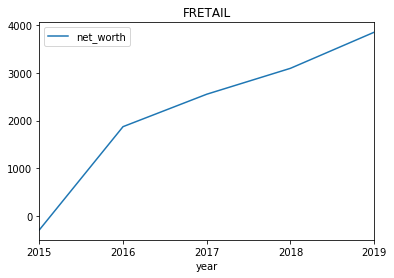

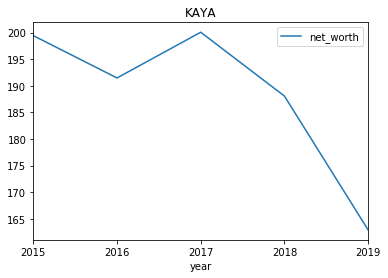

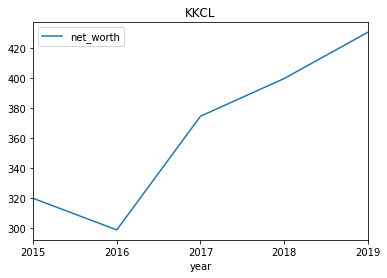

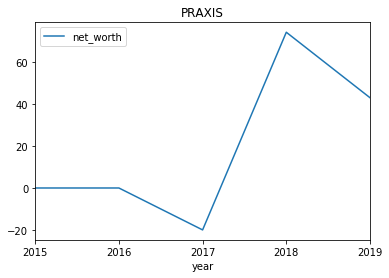

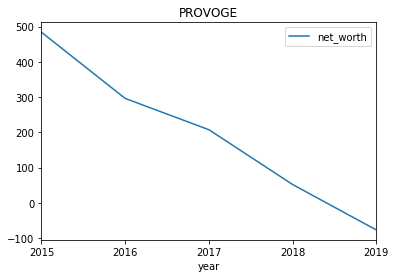

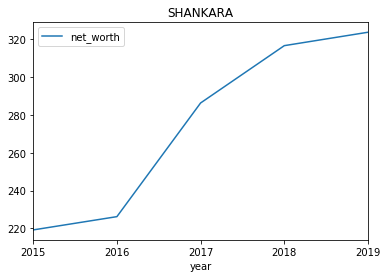

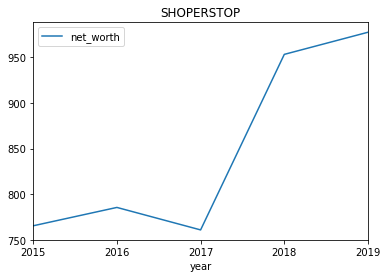

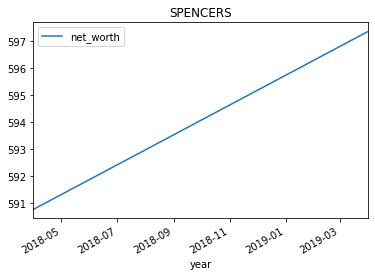

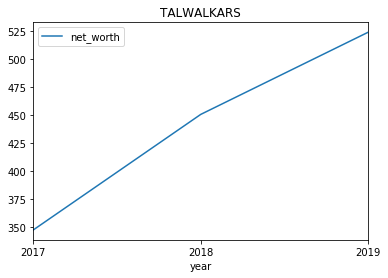

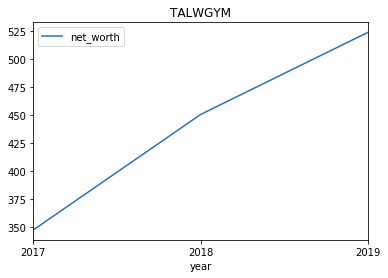

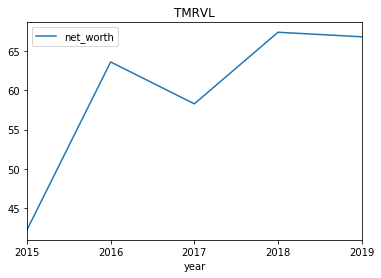

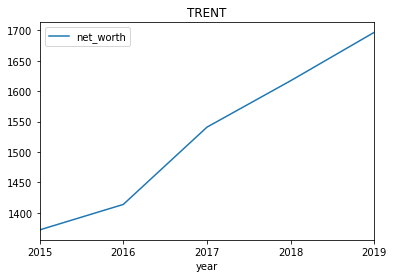

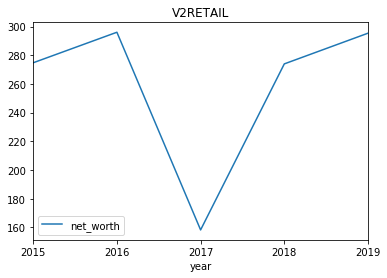

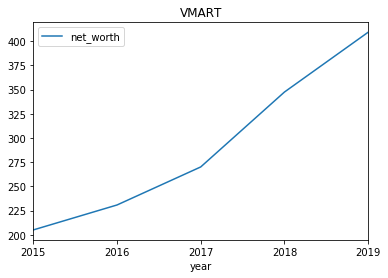

In [5]:
Tex = filter(Fund, 'sector', 'Retail')
Stocks = Tex.stock_id.unique()
features = ['stock_id','year', 'net_worth', 'nw_pct',]

for stock in Stocks:
    tmp_df = Tex[Tex['stock_id'] ==stock].sort_values('year', ascending=True)
    tmp_df['nw_pct'] = tmp_df[['net_worth']].pct_change()
    print(tmp_df[features])
    tmp_df.plot('year', 'net_worth', title=stock)
    

In [6]:
Tex

,stock_id,bv_sh,divd,eps,f_v,mkt_cap,p_b,p_e,industry,sector,id,year,net_worth,total_liabilities,total_current_assests,net_current_assets,total_assets
437,ARCHIES,117.95,NaN,-0.33,2.0,56.41,0.14,-50.61,Retail - Speciality,Retail,1740,2019-04-01,118.01,134.02,92.93,58.48,134.02
438,ARCHIES,117.95,NaN,-0.33,2.0,56.41,0.14,-50.61,Retail - Speciality,Retail,1741,2018-04-01,117.55,133.34,90.16,57.71,133.34
439,ARCHIES,117.95,NaN,-0.33,2.0,56.41,0.14,-50.61,Retail - Speciality,Retail,1742,2017-04-01,106.71,121.03,92.84,59.20,121.03
440,ARCHIES,117.95,NaN,-0.33,2.0,56.41,0.14,-50.61,Retail - Speciality,Retail,1743,2016-04-01,110.72,124.91,96.34,66.97,124.91
441,ARCHIES,117.95,NaN,-0.33,2.0,56.41,0.14,-50.61,Retail - Speciality,Retail,1744,2015-04-01,108.05,114.65,87.97,58.54,114.65
1781,DMART,89.54,NaN,16.36,10.0,95163.52,17.03,93.21,Supermarkets,Retail,3084,2019-04-01,5594.48,6019.30,2174.79,1196.52,6019.30
1782,DMART,89.54,NaN,16.36,10.0,95163.52,17.03,93.21,Supermarkets,Retail,3085,2018-04-01,4642.71,4895.97,2028.03,1311.53,4895.97
1783,DMART,89.54,NaN,16.36,10.0,95163.52,17.03,93.21,Supermarkets,Retail,3086,2017-04-01,3837.06,4940.65,3063.74,2202.23,4940.65
1784,DMART,89.54,NaN,16.36,10.0,95163.52,17.03,93.21,Supermarkets,Retail,3087,2016-04-01,1511.86,2533.82,904.76,357.05,2533.82
1785,DMART,89.54,NaN,16.36,10.0,95163.52,17.03,93.21,Supermarkets,Retail,3088,2015-04-01,1192.91,1933.62,729.89,315.71,1933.62


In [7]:
Stocks = Tex.stock_id.unique()

In [8]:

for stock in Stocks[:5]:
    tmp_df = Tex[Tex['stock_id'] == stock]
    

In [9]:
Tex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 437 to 7758
Data columns (total 17 columns):
stock_id                 78 non-null object
bv_sh                    78 non-null float64
divd                     30 non-null float64
eps                      78 non-null float64
f_v                      78 non-null float64
mkt_cap                  78 non-null float64
p_b                      78 non-null float64
p_e                      78 non-null float64
industry                 78 non-null object
sector                   78 non-null object
id                       78 non-null int64
year                     78 non-null datetime64[ns]
net_worth                78 non-null float64
total_liabilities        78 non-null float64
total_current_assests    78 non-null float64
net_current_assets       78 non-null float64
total_assets             78 non-null float64
dtypes: datetime64[ns](1), float64(12), int64(1), object(3)
memory usage: 11.0+ KB
